In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
data = pd.read_csv("age_gender.csv")
data.head()

,age,ethnicity,gender,img_name,pixels
0,1,2,0,20161219203650636.jpg.chip.jpg,129 128 128 126 127 130 133 135 139 142 145 14...
1,1,2,0,20161219222752047.jpg.chip.jpg,164 74 111 168 169 171 175 182 184 188 193 199...
2,1,2,0,20161219222832191.jpg.chip.jpg,67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3,1,2,0,20161220144911423.jpg.chip.jpg,193 197 198 200 199 200 202 203 204 205 208 21...
4,1,2,0,20161220144914327.jpg.chip.jpg,202 205 209 210 209 209 210 211 212 214 218 21...


In [38]:
data["ethnicity"]

0        2
1        2
2        2
3        2
4        2
        ..
23700    0
23701    1
23702    2
23703    2
23704    0
Name: ethnicity, Length: 23705, dtype: int64

In [39]:
data2 = data.drop('img_name' , axis=1)
data2.head()

,age,ethnicity,gender,pixels
0,1,2,0,129 128 128 126 127 130 133 135 139 142 145 14...
1,1,2,0,164 74 111 168 169 171 175 182 184 188 193 199...
2,1,2,0,67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3,1,2,0,193 197 198 200 199 200 202 203 204 205 208 21...
4,1,2,0,202 205 209 210 209 209 210 211 212 214 218 21...


In [40]:
X = data["pixels"]
Y = data["ethnicity"]

In [41]:
columns = ["age","gender", "ethnicity"]
y = data.drop("pixels", axis=1)

In [42]:
y.nunique()

age            104
ethnicity        5
gender           2
img_name     23479
dtype: int64

In [43]:
X.head()

0    129 128 128 126 127 130 133 135 139 142 145 14...
1    164 74 111 168 169 171 175 182 184 188 193 199...
2    67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3    193 197 198 200 199 200 202 203 204 205 208 21...
4    202 205 209 210 209 209 210 211 212 214 218 21...
Name: pixels, dtype: object

In [44]:
Y.head()

0    2
1    2
2    2
3    2
4    2
Name: ethnicity, dtype: int64

In [70]:
import plotly.graph_objects as go
import plotly.express as px
import pandas as pd

age_counts = data2["ethnicity"].value_counts()

# To provide  set of color palettes  mate
colors = px.colors.qualitative.Pastel


fig = go.Figure(data=go.Bar(
    x=age_counts.index,
    y=age_counts.values,
    marker=dict(color=colors)
))


fig.update_layout(
    title="No of people Belonging to different Ethnicities",
    xaxis=dict(title="Ethnicity"),
    yaxis=dict(title="Count"),
    font=dict(size=14),
)

# To Show the fianl plot mate
fig.show()


In [46]:
import plotly.graph_objects as go
import pandas as pd
import plotly.express as px


ethnicity_counts = data2["ethnicity"].value_counts()

# Creating a donut chart using Plotly
fig = go.Figure(data=go.Pie(
    labels=ethnicity_counts.index,
    values=ethnicity_counts.values,
    hole=0.4,
    hoverinfo='label+percent',
    textinfo='value',
    textfont=dict(size=15),
    marker=dict(colors=px.colors.qualitative.Pastel)
))

fig.update_layout(
    title="Percentage of Different Ethnicities",
    showlegend=True,
    legend=dict(title="Ethnicity"),
    font=dict(size=14),
)
fig.show()

In [47]:
import pandas as pd
X = pd.Series(data['pixels'])
X = X.apply(lambda x:x.split(' '))
X = X.apply(lambda x: np.array(list(map(lambda z: int(z), x))))
X = np.array(X)
X = np.stack(np.array(X), axis=0)

# reshaping data
X = X.reshape(-1, 48, 48, 1)
print("X shape: ", X.shape)

X shape:  (23705, 48, 48, 1)


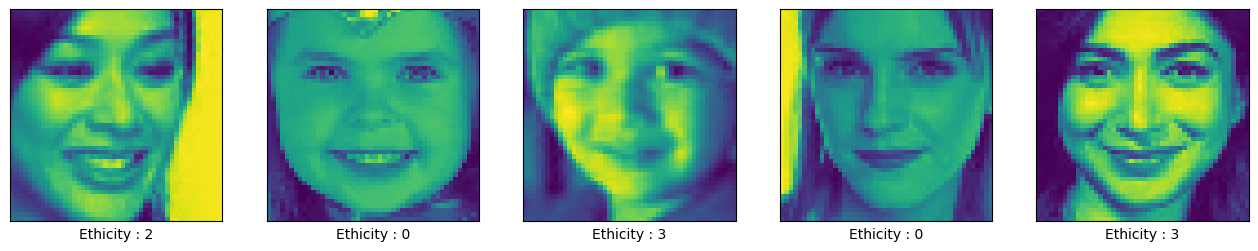

0: White
1: Black
2: Asian
3: Indian
4: Hispanic


In [48]:
import numpy as np
import matplotlib.pyplot as plt

random_indices = np.random.randint(0, 23705, 23704)

plt.figure(figsize=(16, 16))
for i, a in zip(random_indices, range(1, 6)):
    plt.subplot(5, 5, a)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X[i])
    plt.xlabel("Ethicity : " + str(Y.iloc[i]))
plt.show()

print("0: White")
print("1: Black")
print("2: Asian")
print("3: Indian")
print("4: Hispanic")

In [49]:
print(Y)

0        2
1        2
2        2
3        2
4        2
        ..
23700    0
23701    1
23702    2
23703    2
23704    0
Name: ethnicity, Length: 23705, dtype: int64


In [50]:
X.shape

(23705, 48, 48, 1)

In [51]:
def show_plot(x,index):
    plt.figure(figsize= (3,3))
    plt.imshow(x[index])

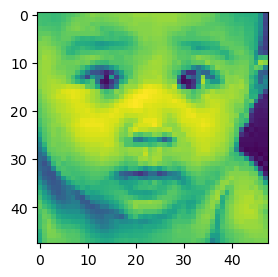

In [52]:
show_plot(X,0)

In [53]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPooling2D

In [54]:
X = X /255

In [55]:
from sklearn.model_selection import train_test_split
y = data2["ethnicity"]
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [56]:
print("Shape of X_train: ", X_train.shape)
print("Shape of Y_train: ", Y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of Y_test: ", Y_test.shape)

Shape of X_train:  (16593, 48, 48, 1)
Shape of Y_train:  (16593,)
Shape of X_test:  (7112, 48, 48, 1)
Shape of Y_test:  (7112,)


In [57]:
data2

,age,ethnicity,gender,pixels
0,1,2,0,129 128 128 126 127 130 133 135 139 142 145 14...
1,1,2,0,164 74 111 168 169 171 175 182 184 188 193 199...
2,1,2,0,67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3,1,2,0,193 197 198 200 199 200 202 203 204 205 208 21...
4,1,2,0,202 205 209 210 209 209 210 211 212 214 218 21...
...,...,...,...,...
23700,99,0,1,127 100 94 81 77 77 74 99 102 98 128 145 160 1...
23701,99,1,1,23 28 32 35 42 47 68 85 98 103 113 117 130 129...
23702,99,2,1,59 50 37 40 34 19 30 101 156 170 177 184 187 1...
23703,99,2,1,45 108 120 156 206 197 140 180 191 199 204 207...


In [58]:
import tensorflow as tf
from tensorflow.keras import layers, models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu')) 
model.add(layers.Dense(5, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, Y_train, epochs=25, batch_size=32)

Epoch 1/25
519/519 [==============================] - 27s 50ms/step - loss: 0.9852 - accuracy: 0.6447
Epoch 2/25
519/519 [==============================] - 26s 50ms/step - loss: 0.7604 - accuracy: 0.7345
Epoch 3/25
519/519 [==============================] - 27s 52ms/step - loss: 0.6797 - accuracy: 0.7638
Epoch 4/25
519/519 [==============================] - 23s 45ms/step - loss: 0.6189 - accuracy: 0.7870
Epoch 5/25
519/519 [==============================] - 24s 47ms/step - loss: 0.5673 - accuracy: 0.8026
Epoch 6/25
519/519 [==============================] - 23s 44ms/step - loss: 0.5244 - accuracy: 0.8168
Epoch 7/25
519/519 [==============================] - 24s 47ms/step - loss: 0.4820 - accuracy: 0.8331
Epoch 8/25
519/519 [==============================] - 25s 47ms/step - loss: 0.4435 - accuracy: 0.8461
Epoch 9/25
519/519 [==============================] - 22s 43ms/step - loss: 0.4032 - accuracy: 0.8608
Epoch 10/25
519/519 [==============================] - 21s 41ms/step - loss: 0.365

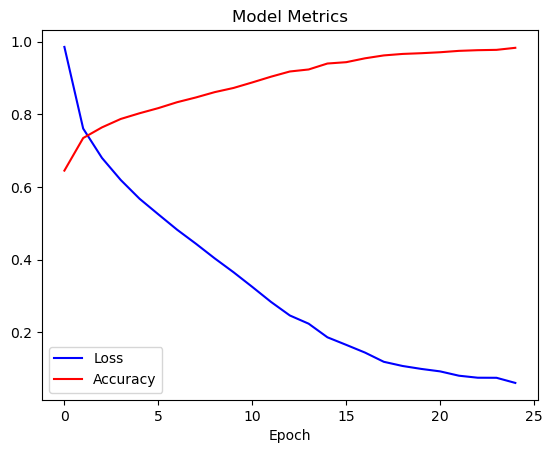

In [59]:
plt.plot(history.history['loss'], color='blue', label='Loss')
plt.plot(history.history['accuracy'], color='red', label='Accuracy')
plt.title('Model Metrics')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [60]:
predicted_labels = model.predict(X_test)

predicted_labels = np.argmax(predicted_labels, axis=1)

accuracy = np.mean(predicted_labels == Y_test)

print('Accuracy:', accuracy*100,"%")

223/223 [==============================] - 3s 11ms/step
Accuracy: 75.91394825646795 %


In [61]:
X_test.shape

(7112, 48, 48, 1)

In [62]:
Y_test.shape

(7112,)

In [63]:
Y_test= Y_test.to_numpy()

index number 6759
1/1 [==============================] - 0s 28ms/step
True Ethnicity: White
Predicted Ethnicity: White
prediction is correct 


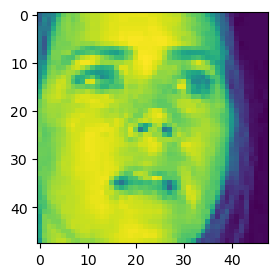

In [66]:
import numpy as np

random_index = np.random.randint(0, len(X_test)) 

test_image = X_test[random_index]

print("index number" , random_index)

true_label = Y_test[random_index]

test_image = np.expand_dims(test_image, axis=0)

prediction = model.predict(test_image)

predicted_label = np.argmax(prediction)


def get_ethnicity(value):

    ethnicities = {

        0: "White",

        1: "Black",

        2: "Asian",

        3: "Indian",

        4: "Hispanic"

    }
    
    if value in ethnicities:

        return ethnicities[value]
    
    else:

        return "Not Found"
    

value = predicted_label


value2 = true_label


print('True Ethnicity:', get_ethnicity(value2))

show_plot(X_test,random_index)

print('Predicted Ethnicity:', get_ethnicity(value))

if(true_label == predicted_label):

    print("prediction is correct ")

else:

    print("prediction is wrong ")

223/223 [==============================] - 2s 11ms/step


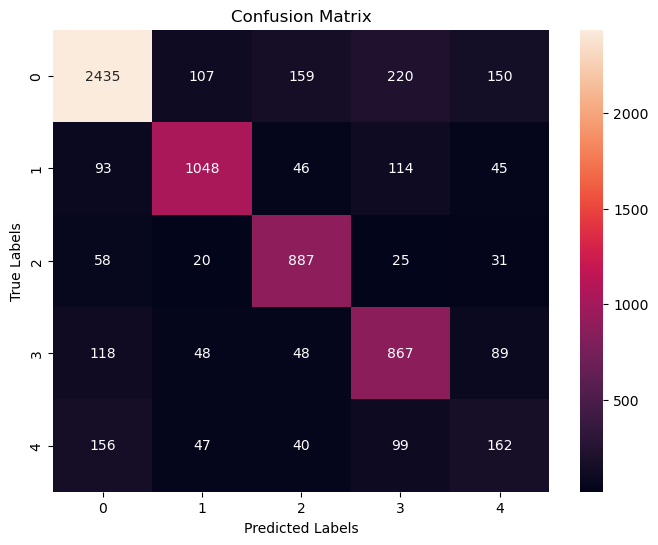

In [65]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Predicting on all samples in X_test
predicted_labels = model.predict(X_test)
predicted_labels = np.argmax(predicted_labels, axis=1)

# Creating confusion matrix
cm = confusion_matrix(Y_test, predicted_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=[0,1,2,3,4], yticklabels=[0, 1, 2, 3, 4])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()